In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle
# from pathlib import Path

In [30]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# img_193_loc = [str(img) for img in Path('/content/drive/My Drive/ai_project/data/img_193').glob('*.jpg')]
# img_193_loc[0]

In [32]:
with open('/content/drive/My Drive/ai_project/data/integrated.pkl', 'rb') as f:
  df = pickle.load(f)

In [33]:
df.head()

,f10-7,mag,Np,Vp,Tpr,ssn,img_193_loc,img_304_loc
1947-03-05,306.10,None,None,None,None,None,None,None
1947-03-06,306.00,None,None,None,None,None,None,None
1947-03-07,321.40,None,None,None,None,None,None,None
1947-03-08,345.60,None,None,None,None,None,None,None
1947-03-09,335.75,None,None,None,None,None,None,None


In [34]:
img_loc = df[['img_193_loc', 'img_304_loc']].iloc[23191:, :]
img_loc.head()

,img_193_loc,img_304_loc
2010-09-01,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-02,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-03,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-04,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-05,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...


In [35]:
from keras.utils import load_img, img_to_array

In [36]:
img_loc.iloc[0, 0]

'/content/drive/My Drive/ai_project/data/img_193/2010_09_01.jpg'

In [37]:
img_ = load_img('/content/drive/My Drive/ai_project/data/img_193/2010_09_01.jpg', target_size=(512, 512))
img = img_to_array(img_)[:, :, 0]
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [2., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.]], dtype=float32)

In [38]:
def load_image(img_loc):
    img_ = load_img(img_loc, target_size=(512, 512))
    img = img_to_array(img_)[:, :, 0]
    print(img.shape, img[250])
    plt.imshow(img_)

(512, 512) [ 62.  68.  67.  75.  71.  74.  74.  76.  80.  81.  83.  84.  89.  92.
  94.  97.  97.  99. 101. 104. 105. 110. 113. 115. 120. 122. 123. 126.
 130. 130. 132. 134. 136. 139. 139. 143. 145. 147. 150. 152. 154. 157.
 160. 163. 166. 169. 171. 176. 180. 183. 183. 185. 189. 192. 187. 172.
 167. 167. 168. 169. 164. 160. 155. 153. 156. 156. 149. 138. 137. 135.
 128. 128. 125. 123. 122. 116. 123. 127. 127. 127. 125. 125. 112. 110.
 106. 102. 103.  97.  94.  91.  90.  87.  92.  92.  95.  97.  95.  93.
  94.  94.  95.  96.  98.  93.  90.  89.  88.  90.  90.  91.  85.  90.
  80.  79.  73.  76.  74.  68.  66.  70.  69.  70.  66.  68.  69.  76.
  80.  81.  84.  93. 102. 100.  94.  92.  89.  86.  89.  93.  89.  92.
  89.  84.  79.  81.  78.  75.  79.  80.  84.  82.  82.  88.  88.  88.
  89.  97.  98. 100. 110. 110. 113. 112. 113. 117. 119. 117. 117. 114.
 106. 109.  99.  98.  96.  98.  99.  95.  93.  98. 102.  99. 100.  99.
  97. 102. 103.  98.  90.  95.  88.  78.  65.  63.  60.  59.  59. 

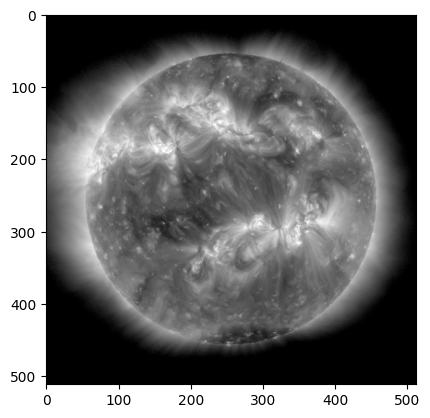

In [39]:
load_image(img_loc.iloc[211, 0])

In [40]:
def imgarr(img_loc):
  try:
    img_ = load_img(img_loc, target_size=(512, 512))
    img = img_to_array(img_)[:, :, 0].reshape(512, 512, 1)
  except:
    img = None
  return img

In [41]:
temp_img = imgarr(img_loc.iloc[0, 0])
print(temp_img.shape)
temp_img

(512, 512, 1)


array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[1.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]],

       [[2.],
        [0.],
        [1.],
        ...,
        [0.],
        [1.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [1.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]]], dtype=float32)

In [42]:
print(imgarr(None))

None


In [43]:
arrayed_img = img_loc.copy()

In [44]:
arrayed_img.head()

,img_193_loc,img_304_loc
2010-09-01,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-02,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-03,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-04,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...
2010-09-05,/content/drive/My Drive/ai_project/data/img_19...,/content/drive/My Drive/ai_project/data/img_30...


In [45]:
type(arrayed_img.iloc[0, 0])

str

In [ ]:
arrayed_img['img_193_loc'] = arrayed_img['img_193_loc'].apply(imgarr)
arrayed_img['img_304_loc'] = arrayed_img['img_304_loc'].apply(imgarr)

In [ ]:
import pickle

with open('/content/drive/My drive/ai_project/data/arrayed_img.pkl', 'wb') as f:
  pickle.dump(arrayed_img, f)

In [34]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
import random

In [42]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(10, activation="sigmoid"))

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 510, 510, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 255, 255, 64)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 255, 255, 64)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 126, 126, 64)     

In [ ]:
# train = ImageDataGenerator(rescale=1/255)

# train_dataset = train.flow_from_directory('/content/drive/My Drive/ai_project/data/img_193/',
#                                           target_size=(512, 512),
#                                           batch_size = 32,
#                                           class_mode = 'binary')